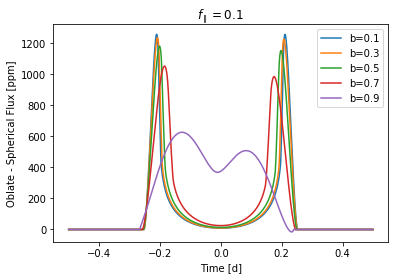

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import batman
import robin
import numpy as np

def aRs_i(T14, b, transit_params):
    """
    Convert from duration and impact param to a/Rs and inclination

    Parameters
    ----------
    transit_params : `batman.TransitParams`
        Transit parameters
    Returns
    -------
    aRs : float
        Semi-major axis in units of stellar radii
    i : float
        Orbital inclination in degrees
    """
    eccentricity = transit_params.ecc
    omega = transit_params.w
    P = transit_params.per
    RpRs = transit_params.p0 if hasattr(transit_params, 'p0') else transit_params.rp

    # Eccentricity term for b -> a/rs conversion
    beta = (1 - eccentricity**2)/(1 + eccentricity*np.sin(np.radians(omega)))

    # Eccentricity term for duration equation:
    c = (np.sqrt(1 - eccentricity**2) /
         (1 + eccentricity*np.sin(np.radians(omega))))

    i = np.arctan(beta * np.sqrt((1 + RpRs)**2 - b**2) /
                  (b * np.sin(T14*np.pi / (P*c))))
    aRs = b/(np.cos(i) * beta)
    return aRs, np.degrees(i)

duration = 0.5040
brange = [0.1, 0.3, 0.5, 0.7, 0.9]

params.per = 111.4367
params.t0 = 2455210.6420
params.inc = 89.269
params.a = 97
params.rp = 0.1001
params.duration = 0.5
params.b = 0.808
params.ecc = 0.9330
params.w = 300.77

# fig, ax = plt.subplots(2, 1, figsize=(5, 8))

for b in brange:
    params = batman.TransitParams()
    params.per = 111.4367
    params.t0 = 0
    params.rp = 0.1
    params.u = [0.5, 0.2]
    params.w = 300.77
    params.ecc = 0.9330
    params.limb_dark = 'quadratic'
    ars, inc = aRs_i(duration, b, params)
    params.inc = inc
    params.a = ars

    params2 = robin.TransitParams()
    params2.per = 111.4367
    params2.t0 = 0
    params2.p0 = params.rp/(1 - 0.1)**2
    params2.p1 = params.rp

    params2.u = [0.5, 0.2]
    params2.w = 300.77
    params2.ecc = 0.9330
    params2.limb_dark = 'quadratic'
    ars, inc = aRs_i(duration, b, params2)
    params2.inc = inc
    params2.a = ars
    
    times = np.linspace(-0.5, 0.5, 1000)

    m = batman.TransitModel(params, times)
    f1 = m.light_curve(params)

    m = robin.TransitModel(params2, times)
    f2 = m.light_curve(params2)
#     ax[0].plot(times, f1, label='b={0:.1f}'.format(b))
#     ax[0].plot(times, f2, label='b={0:.1f}'.format(b))


    plt.plot(times, 1e6*(f2 - f1), label='b={0:.1f}'.format(b))
    
plt.ylabel('Oblate - Spherical Flux [ppm]')
plt.xlabel('Time [d]')
plt.title("$f_\parallel = 0.1$")
plt.legend()